This notebook will build up models from the baseline given here: https://github.com/asapdiscovery/asap-polaris-challenge-baselines/blob/main/ADMET/admet_baselines.ipynb

In [1]:
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sn
import statsmodels as sm
import datamol as dm
import yellowbrick
import numpy as np
import seaborn as sns

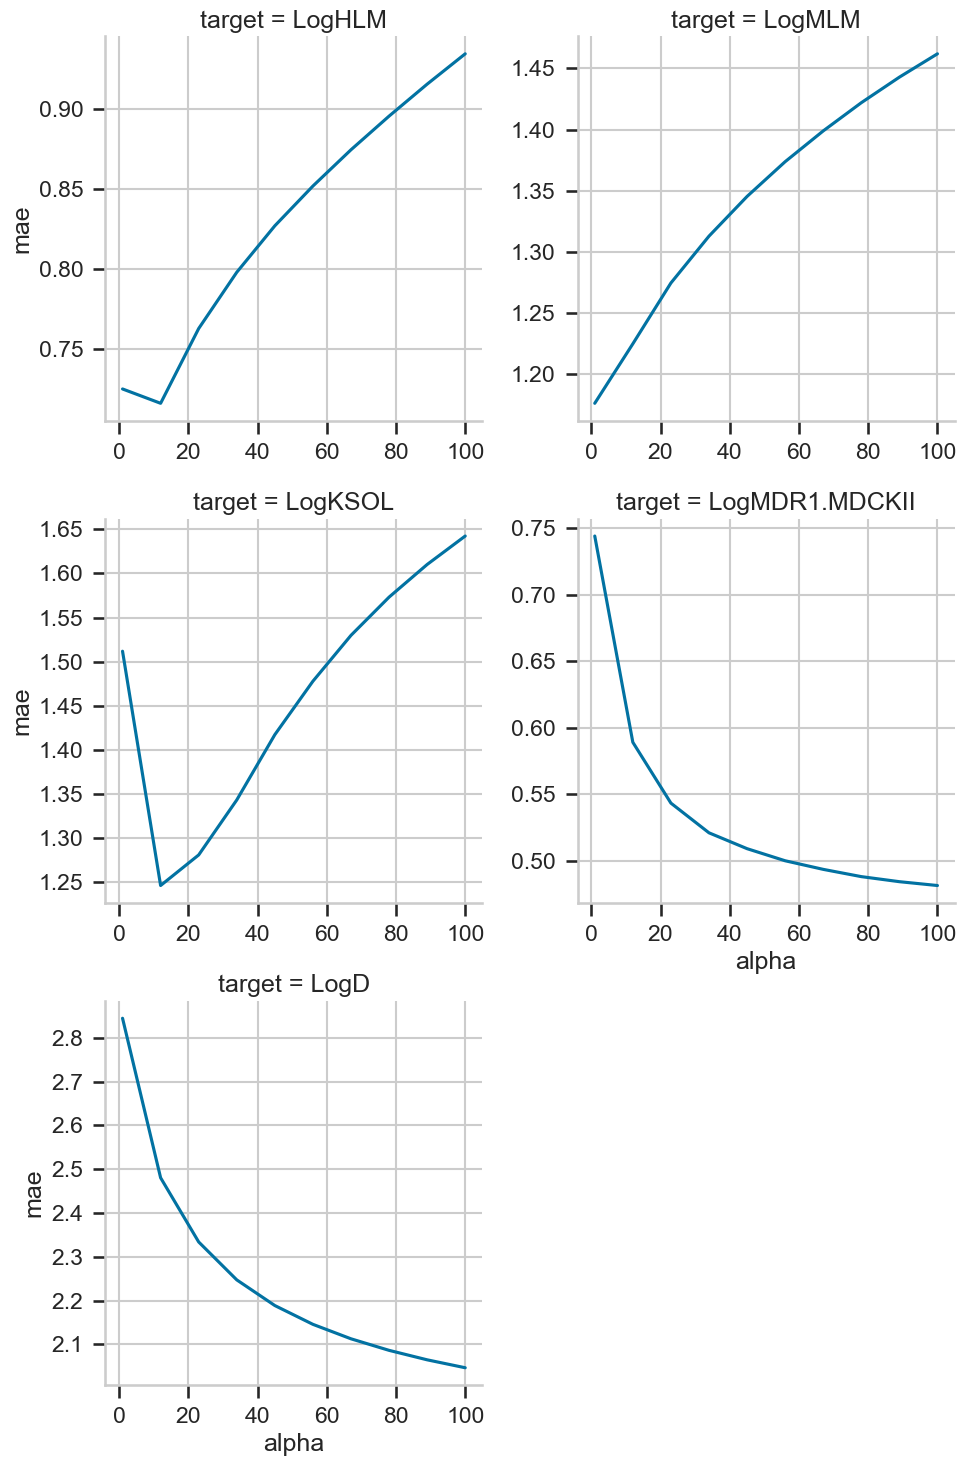

In [2]:
results = pd.read_csv('single_task_logistic_ordinal_scan_0.csv')
with sns.plotting_context('talk'):
    sns.relplot(data=results, x='alpha', y='mae', col='target', col_wrap=2,
                kind='line', facet_kws=dict(sharex=False, sharey=False))

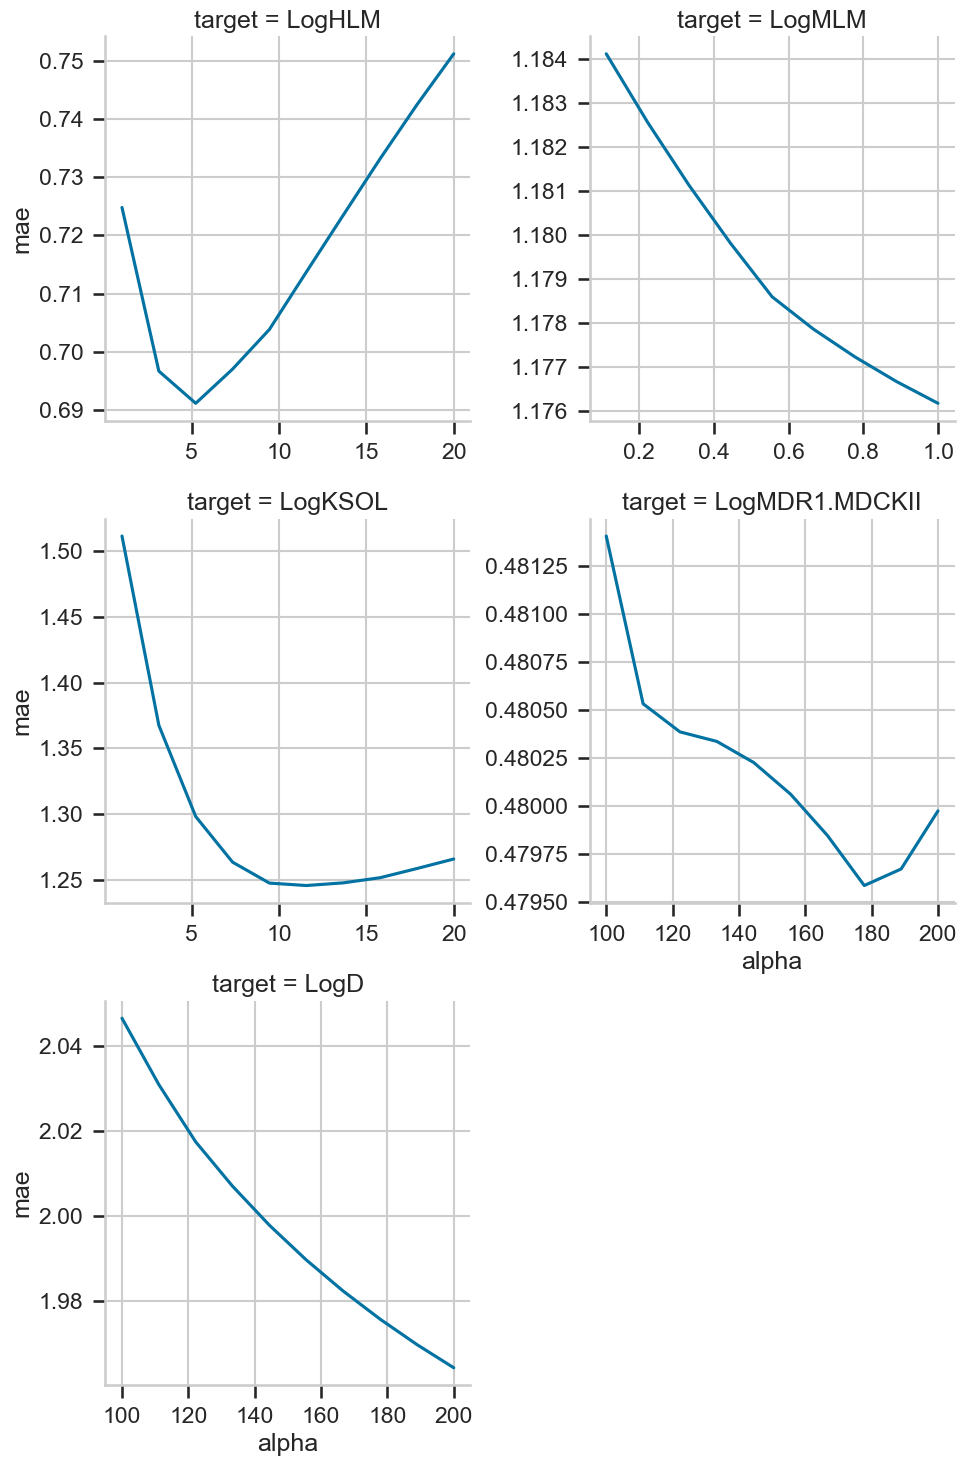

In [3]:
results = pd.read_csv('single_task_logistic_ordinal_scan_1.csv')
with sns.plotting_context('talk'):
    sns.relplot(data=results, x='alpha', y='mae', col='target', col_wrap=2,
                kind='line', facet_kws=dict(sharex=False, sharey=False))

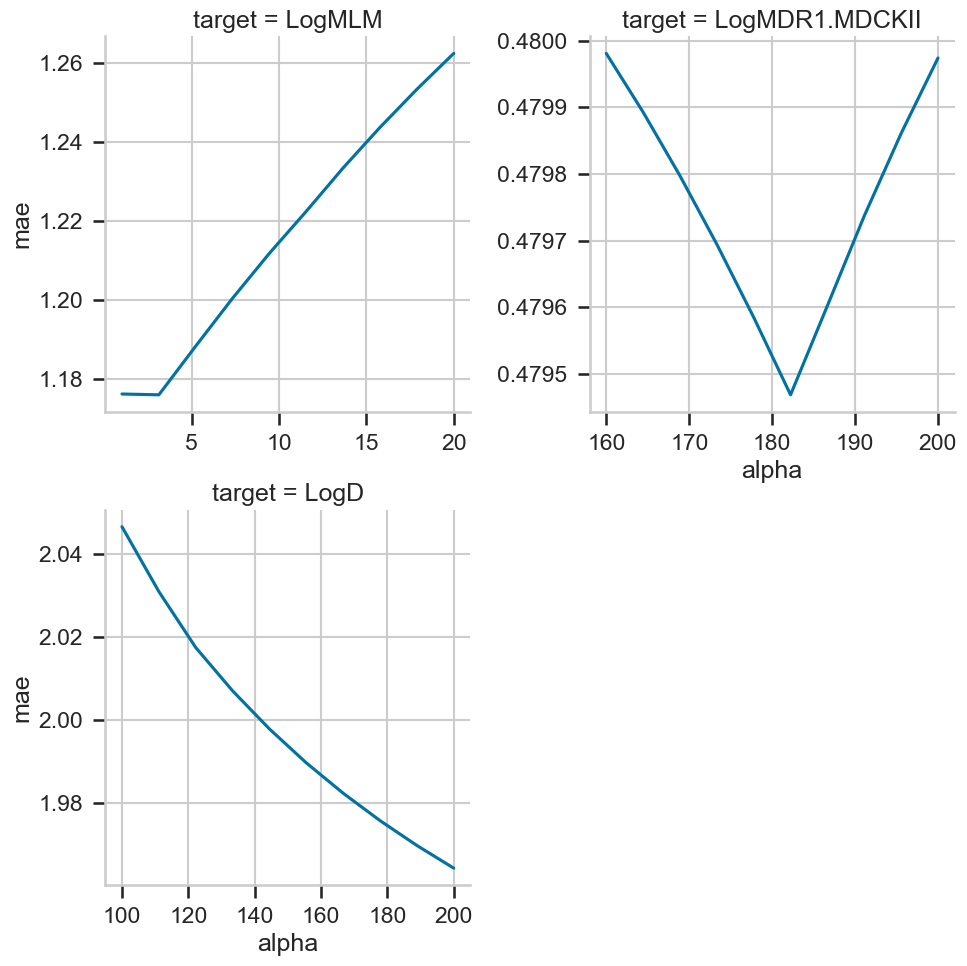

In [4]:
results = pd.read_csv('single_task_logistic_ordinal_scan_2.csv')
with sns.plotting_context('talk'):
    sns.relplot(data=results, x='alpha', y='mae', col='target', col_wrap=2,
                kind='line', facet_kws=dict(sharex=False, sharey=False))

,target,alpha,mae
1,LogHLM,4.444444,0.680621
20,LogKSOL,6.666667,1.228657
9,LogMLM,2.222222,1.159040


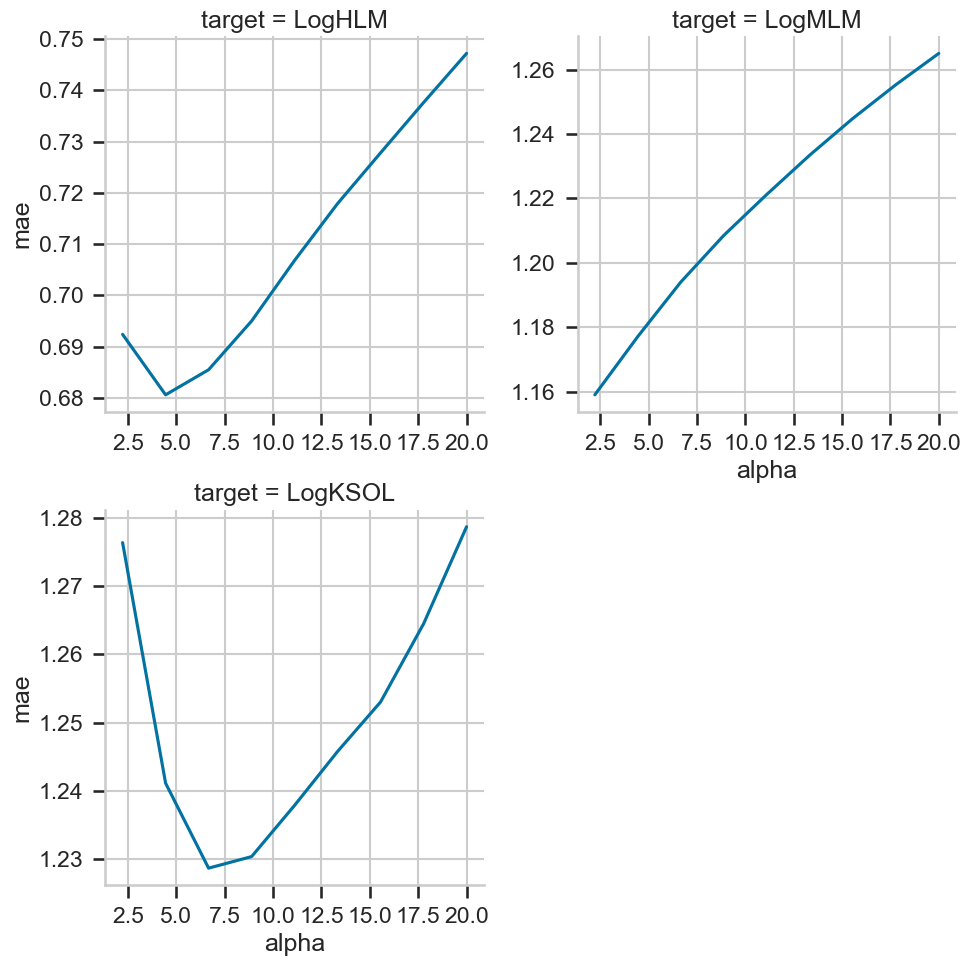

In [9]:
results = pd.read_csv('single_task_logistic_ordinal_scan_3.csv')
with sns.plotting_context('talk'):
    sns.relplot(data=results, x='alpha', y='mae', col='target', col_wrap=2,
                kind='line', facet_kws=dict(sharex=False, sharey=False))
# results = pd.read_csv('single_task_logistic_ordinal_scan_5.csv')
results.loc[results.groupby('target')['mae'].idxmin(), ]

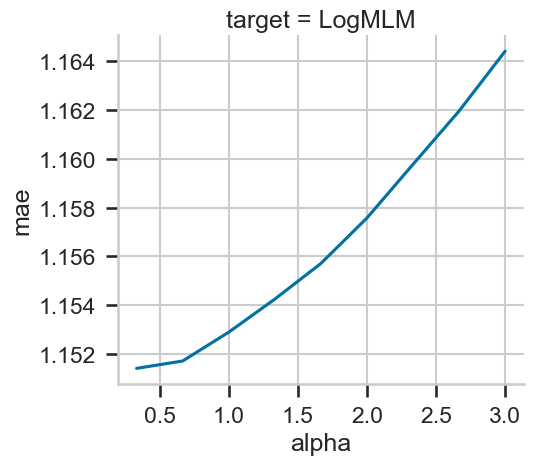

In [6]:
results = pd.read_csv('single_task_logistic_ordinal_scan_4.csv')
with sns.plotting_context('talk'):
    sns.relplot(data=results, x='alpha', y='mae', col='target', col_wrap=2,
                kind='line', facet_kws=dict(sharex=False, sharey=False))

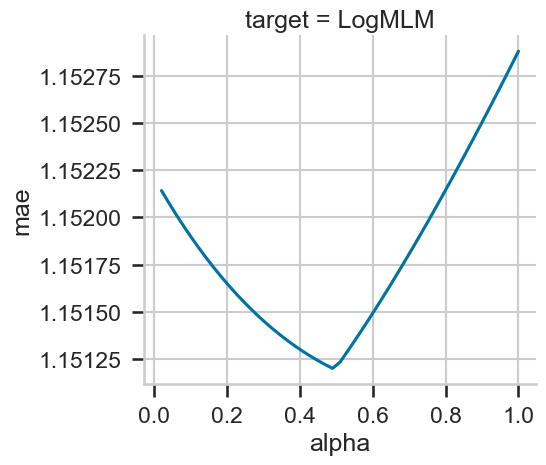

In [7]:
results = pd.read_csv('single_task_logistic_ordinal_scan_5.csv')
with sns.plotting_context('talk'):
    sns.relplot(data=results, x='alpha', y='mae', col='target', col_wrap=2,
                kind='line', facet_kws=dict(sharex=False, sharey=False))

In [8]:
results = pd.read_csv('single_task_logistic_ordinal_scan_5.csv')
results.loc[results.groupby('target')['mae'].idxmin(), ]

,target,alpha,mae
23,LogMLM,0.489796,1.151199


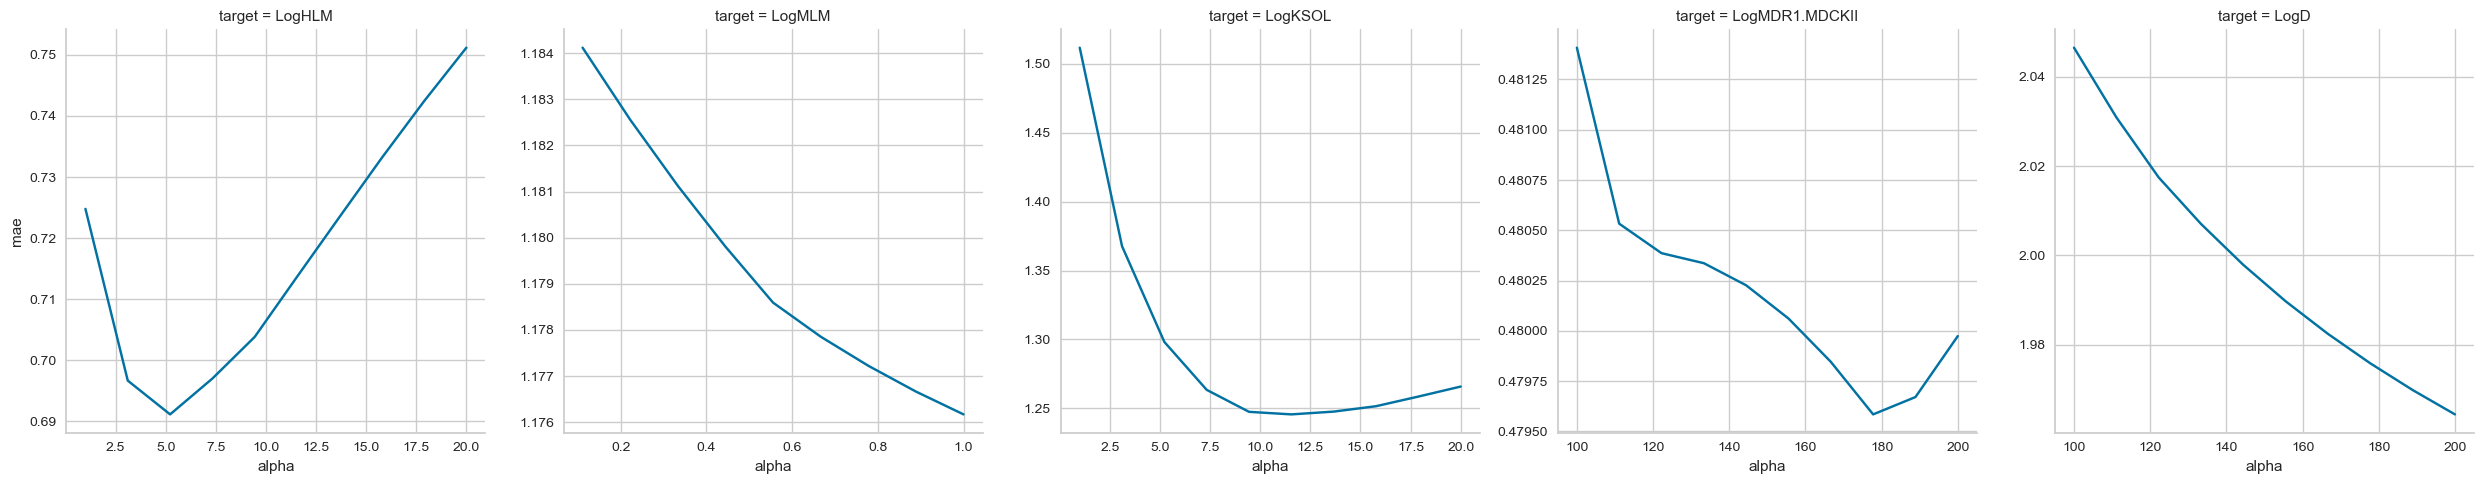

In [52]:
# results = pd.read_csv('single_task_logistic_ordinal_scan_1.csv')
sns.relplot(data=results, x='alpha', y='mae', col='target', kind='line', facet_kws=dict(sharex=False, sharey=False))
results.to_csv('single_task_logistic_ordinal_scan_1.csv')

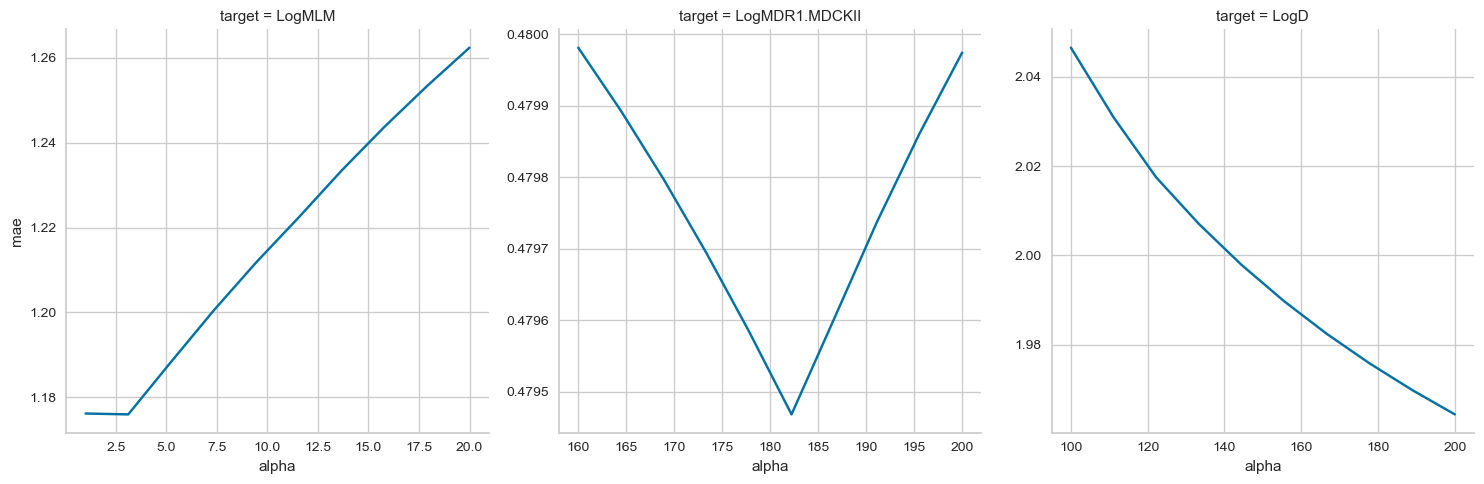

In [51]:
results2 = pd.read_csv('single_task_logistic_ordinal_scan_2.csv')
sns.relplot(data=results2, x='alpha', y='mae', col='target', kind='line', facet_kws=dict(sharex=False, sharey=False))
# results2.to_csv('single_task_logistic_ordinal_scan_2.csv')

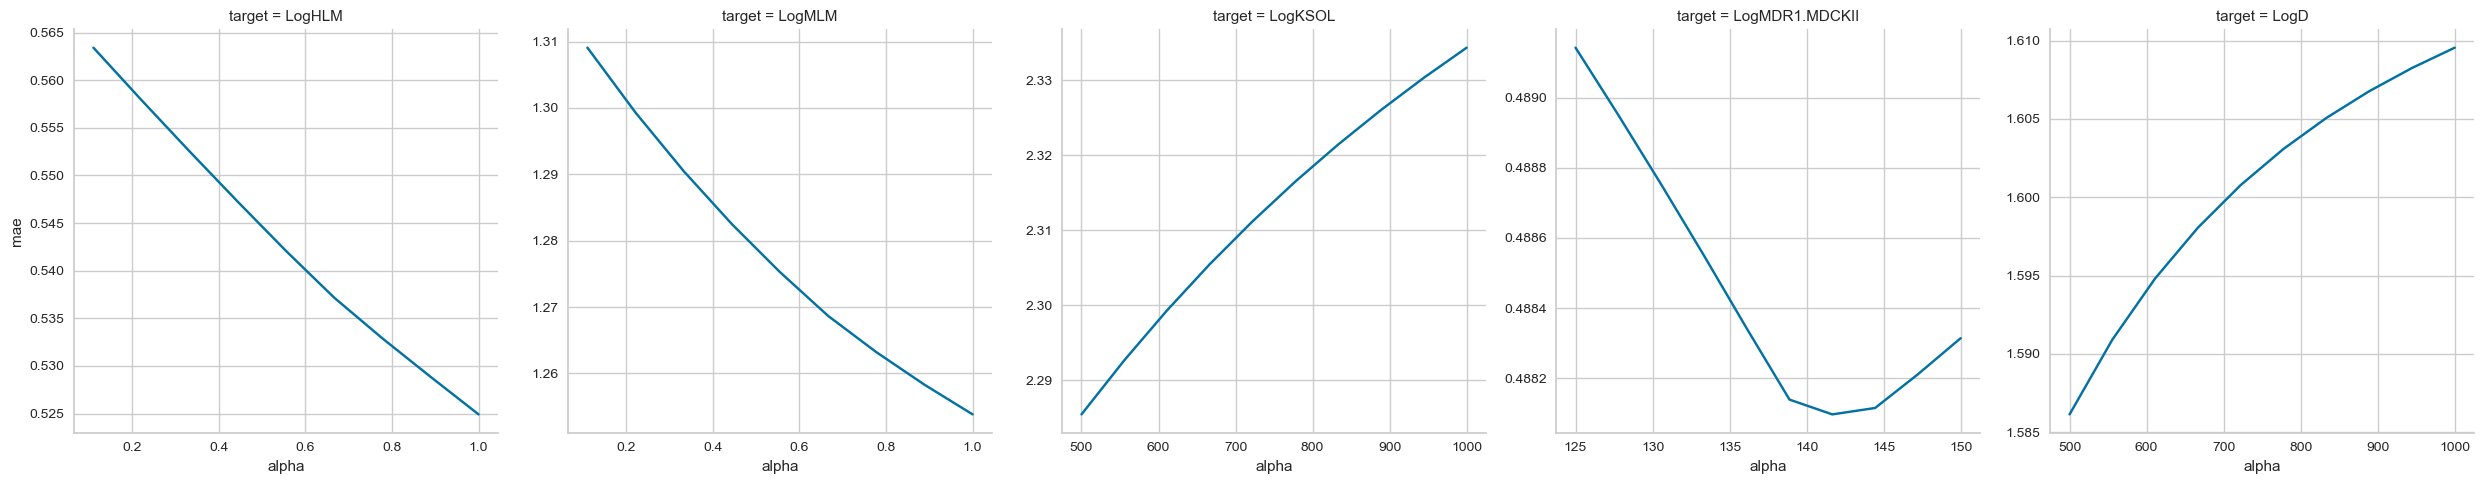

In [19]:
# results_2 = pd.read_csv('single_task_logistic_ordinal_scan_2.csv') # overwrote scan_2 with scan_3! 
sns.relplot(data=results, x='alpha', y='mae', col='target', kind='line', facet_kws=dict(sharex=False, sharey=False))
results.to_csv('single_task_logistic_ordinal_scan_2.csv')

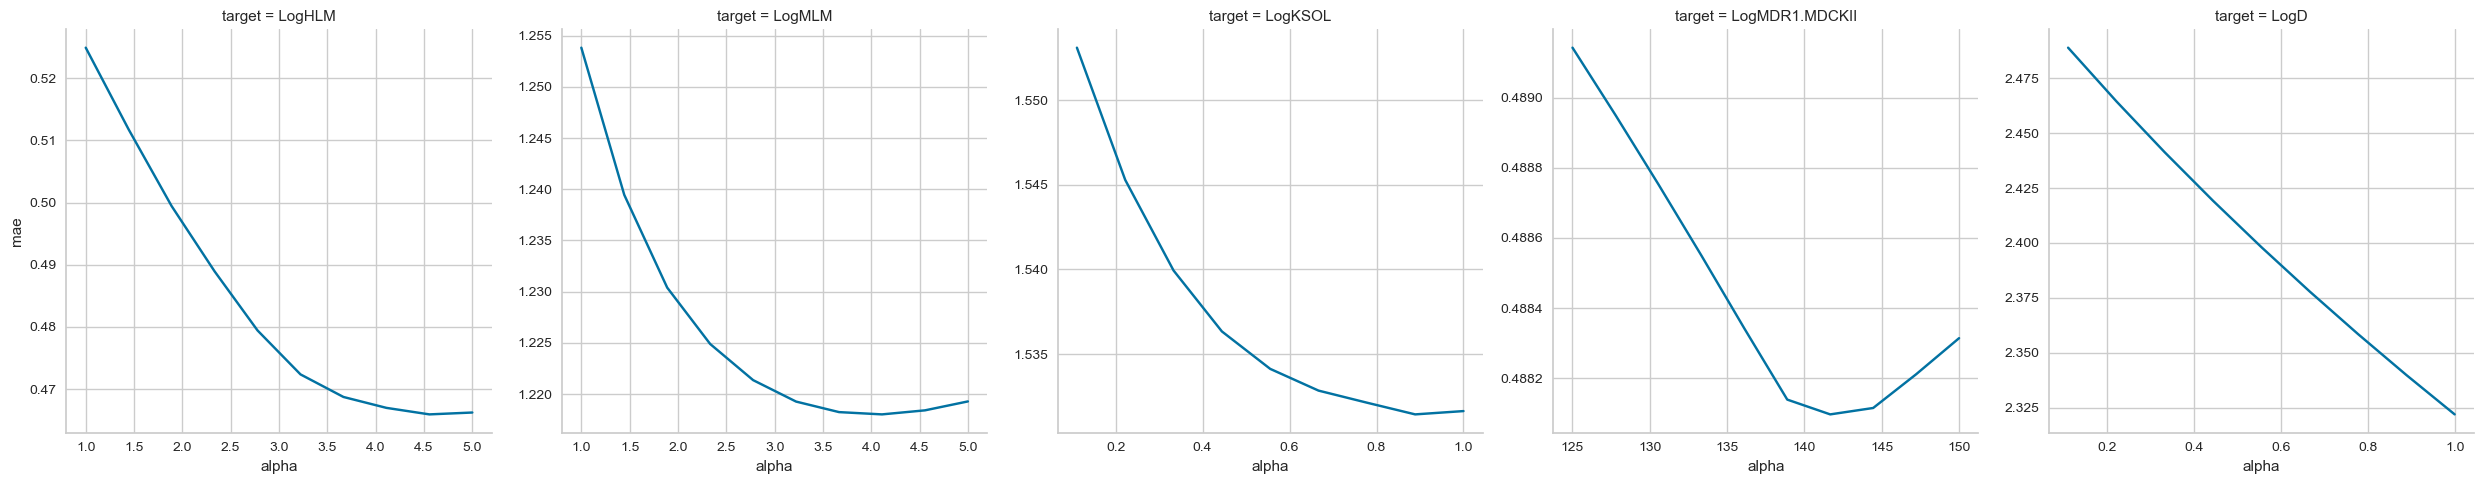

In [ ]:
results_3 = pd.read_csv('single_task_logistic_ordinal_scan_3.csv') 
sns.relplot(data=results_3, x='alpha', y='mae', col='target', kind='line', facet_kws=dict(sharex=False, sharey=False))
# results_3.to_csv('single_task_logistic_ordinal_scan_3.csv')

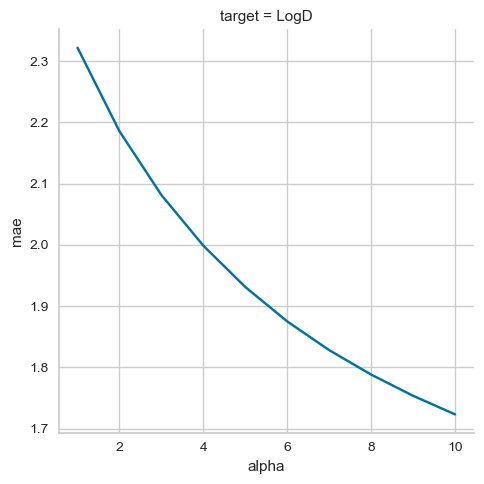

In [22]:
results_4 = pd.read_csv('single_task_logistic_ordinal_scan_4.csv') 
sns.relplot(data=results_4, x='alpha', y='mae', col='target', kind='line', facet_kws=dict(sharex=False, sharey=False))

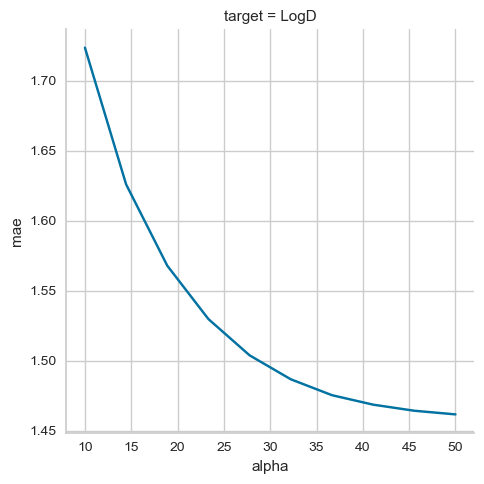

In [25]:
results_5 = pd.read_csv('single_task_logistic_ordinal_scan_5.csv') 
sns.relplot(data=results_5, x='alpha', y='mae', col='target', kind='line', facet_kws=dict(sharex=False, sharey=False))

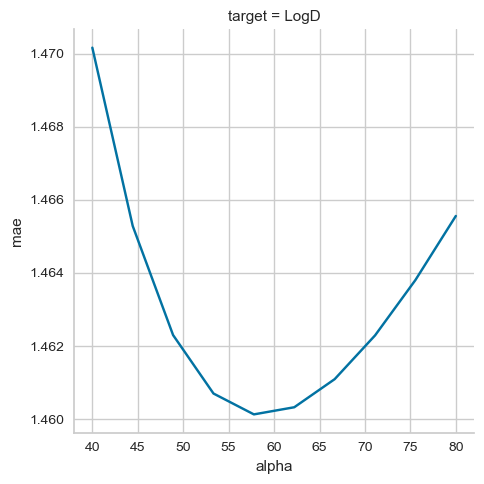

In [28]:
results_6= pd.read_csv('single_task_logistic_ordinal_scan_6.csv') 
sns.relplot(data=results_6, x='alpha', y='mae', col='target', kind='line', facet_kws=dict(sharex=False, sharey=False))

In [29]:
results_3.loc[results_3.groupby('target')['mae'].idxmin(), :]

,target,alpha,mae
47,LogD,1.000000,2.321883
8,LogHLM,4.555556,0.465926
27,LogKSOL,0.888889,1.531435
35,LogMDR1.MDCKII,141.666667,0.488096
17,LogMLM,4.111111,1.218019


In [30]:
results_6.loc[results_6.groupby('target')['mae'].idxmin(), :]

,target,alpha,mae
4,LogD,57.777778,1.460131


In [42]:
list(pd.read_csv('LogDbetas.csv').iloc[:, 0].values)

['clogp',
 'fsp3',
 'mw',
 'n_aliphatic_carbocycles',
 'n_aliphatic_heterocyles',
 'n_aliphatic_rings',
 'n_aromatic_carbocycles',
 'n_aromatic_heterocyles',
 'n_aromatic_rings',
 'n_heavy_atoms',
 'n_hetero_atoms',
 'n_lipinski_hba',
 'n_lipinski_hbd',
 'n_rings',
 'n_rotatable_bonds',
 'n_saturated_carbocycles',
 'n_saturated_heterocyles',
 'n_saturated_rings',
 'qed',
 'sas',
 'tpsa']

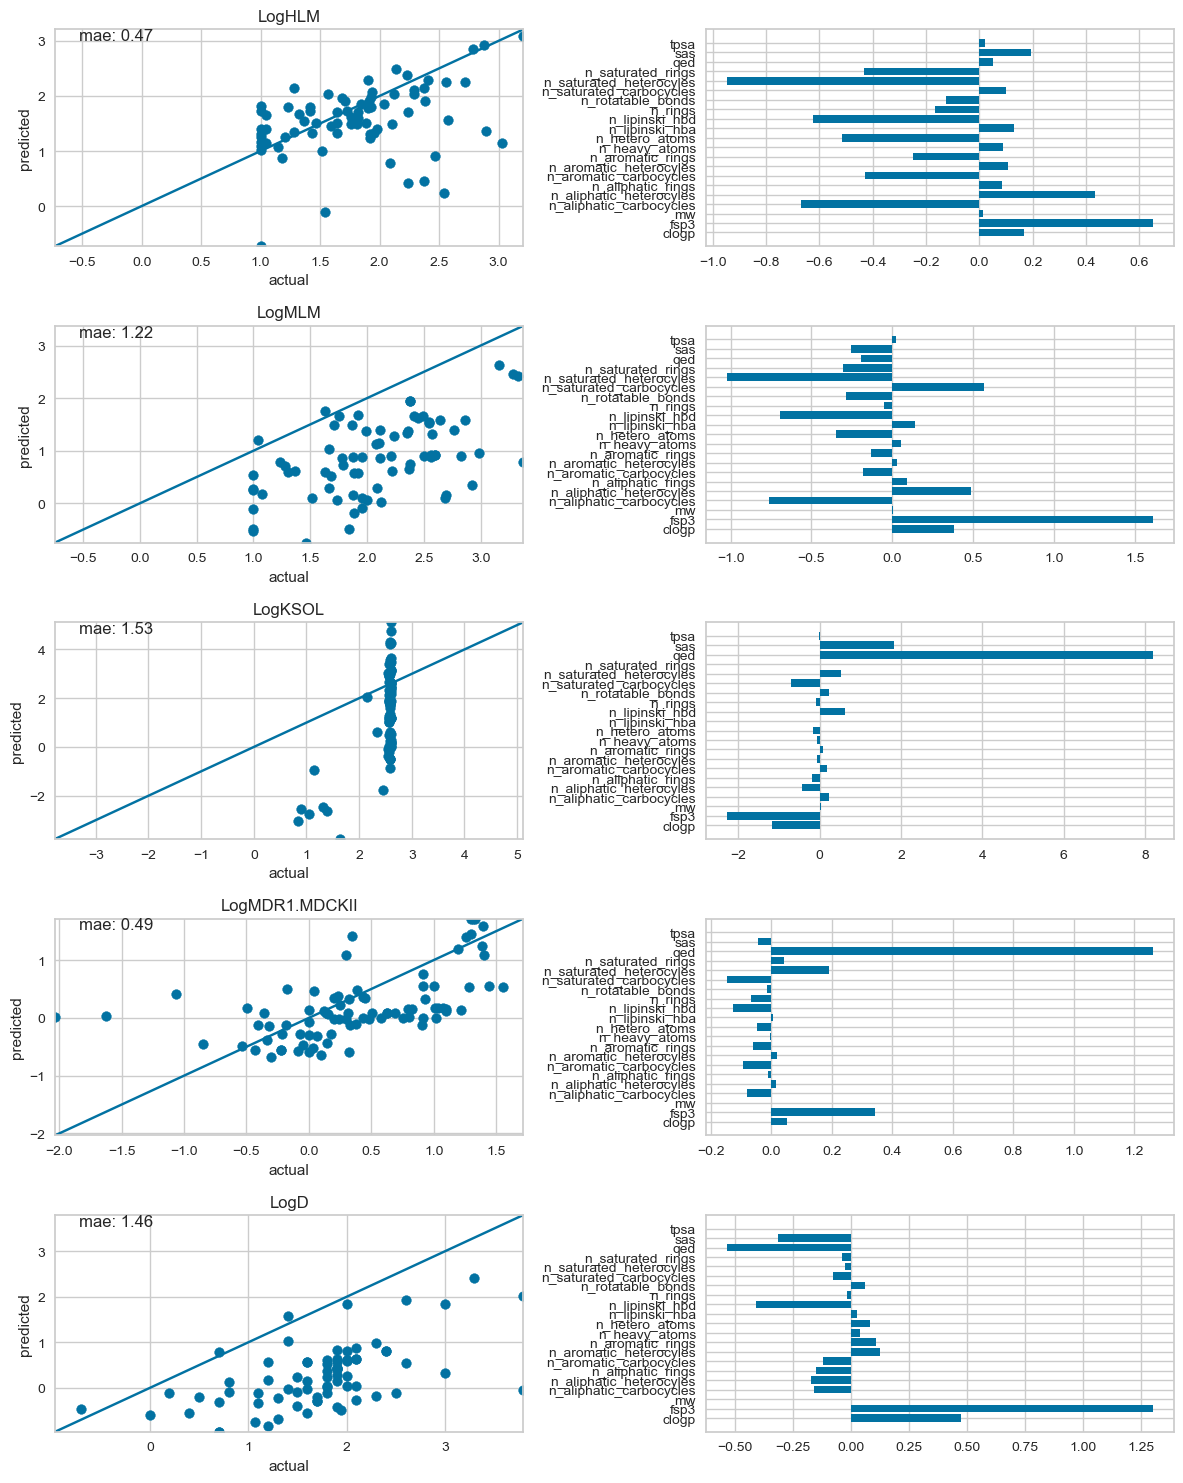

In [15]:
results = pd.read_csv('ordinal_data_split_1/single_task_logistic_ordinal_scan_2.csv') 
targets = results.target.unique()

plot_names = ['predictions', 'betas']
x_names = list(pd.read_csv('ordinal_data_split_1/LogDbetas.csv').iloc[:, 0].values)
fig, axes = plt.subplots(len(targets), len(plot_names), figsize=(12, 3*len(targets)))

for i, target in enumerate(targets): 
    for j, plot_name in enumerate(plot_names):
        df = pd.read_csv(f"ordinal_data_split_1/{target}{plot_name}.csv")
        if plot_name == 'predictions':
            y_hat = df.yhat.values
            y = df.y.values

            y_min, y_max = np.concatenate((y, y_hat)).min(), np.concatenate((y, y_hat)).max() 
            
            axes[i, j].scatter(y, y_hat)
            axes[i, j].set_xlim((y_min, y_max))
            axes[i, j].set_ylim((y_min, y_max))
            axes[i, j].plot([y_min, y_max], [y_min, y_max])
            axes[i, j].set_xlabel(f'actual')
            axes[i, j].set_ylabel(f'predicted')
            axes[i, j].set_title(f"{target}")
            axes[i, j].annotate(text=f"mae: {sk.metrics.mean_absolute_error(y, y_hat):4.2f}", xy=(0.05, 0.95), xycoords='axes fraction')
        if plot_name == 'betas':
            y = df.loc[df.iloc[:, 0].isin(x_names), 'beta'].values
            axes[i, j].barh(x_names, y,)


plt.tight_layout()
